**PHASE 2: BUILDING THE 3D U-NET MODEL**
4
Objective: To design a lightweight 3D U-Net model suitable for low-resource systems.  

(Learn visually: Watch the tutorial video for this section.)
4.1
      A. Introduction to 3D U-Net 
The 3D U-Net architecture is a powerful model for medical image segmentation tasks, particularly for volumetric data like brain MRI scans. It extends the traditional 2D U-Net by incorporating a third spatial dimension, enabling the model to capture 3D contextual information. This is especially important for
tasks like brain tumour segmentation, where tumours can span multiple slices in a 3D volume.
 
However, 3D U-Net models can be computationally expensive, making them challenging to run on low-resource systems (e.g., normal CPUs). To address this, we make several modifications to create a lightweight 3D U-Net:  
- Fewer Layers: Reducing the number of convolutional layers to decrease
model complexity.  
- Smaller Filters: Using fewer filters in each convolutional layer to
reduce memory usage.  
- Efficient Patch Extraction: Processing smaller 3D patches instead of the
entire volume to fit within memory constraints. 
**B. Model Implementation**
The code for the implementation of the 3D U-Net model was referenced from Sreenivas [Bhattiprolu, n.d.] who converted his 2D U-Net to a simple 3D U-Net model. The 3D U-Net uses 3D convolutions to process volumetric data, includes dropout layers to prevent overfitting, uses a contracting path (encoder) to extract features and an expanding path (decoder) to reconstruct segmentation maps, and outputs a multi-class segmentation mask. (Now open your "bt_segmentation.ipynb" file)

In [23]:
from keras.layers import (
    Input, 
    Conv3D, 
    MaxPooling3D, 
    concatenate, 
    Conv3DTranspose, 
    Dropout, 
    Activation
)
from keras.models import Model


kernel_initializer =  'he_uniform' #Try others if you want
 
################################################################
def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS,
num_classes):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH,
IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No needfor this if we normalize our inputs beforehand
    s = inputs
 
    #Contraction path
    c1 = Conv3D(16, (3, 3, 3), activation='relu',kernel_initializer=kernel_initializer, padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv3D(16, (3, 3, 3), activation='relu',
kernel_initializer=kernel_initializer, padding='same')(c1)
    p1 = MaxPooling3D((2, 2, 2))(c1)
 
    c2 = Conv3D(32, (3, 3, 3), activation='relu',
kernel_initializer=kernel_initializer, padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv3D(32, (3, 3, 3), activation='relu',
kernel_initializer=kernel_initializer, padding='same')(c2)
    p2 = MaxPooling3D((2, 2, 2))(c2)
 
    c3 = Conv3D(64, (3, 3, 3), activation='relu',
kernel_initializer=kernel_initializer, padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv3D(64, (3, 3, 3), activation='relu',
kernel_initializer=kernel_initializer, padding='same')(c3)
    p3 = MaxPooling3D((2, 2, 2))(c3)
 
    c4 = Conv3D(128, (3, 3, 3), activation='relu',
kernel_initializer=kernel_initializer, padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv3D(128, (3, 3, 3), activation='relu',
kernel_initializer=kernel_initializer, padding='same')(c4)
    p4 = MaxPooling3D(pool_size=(2, 2, 2))(c4)
 
    c5 = Conv3D(256, (3, 3, 3), activation='relu',
kernel_initializer=kernel_initializer, padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv3D(256, (3, 3, 3), activation='relu',
kernel_initializer=kernel_initializer, padding='same')(c5)
 
    #Expansive path
    u6 = Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2),
padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv3D(128, (3, 3, 3), activation='relu',
kernel_initializer=kernel_initializer, padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv3D(128, (3, 3, 3), activation='relu',
kernel_initializer=kernel_initializer, padding='same')(c6)
 
    u7 = Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2),
padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv3D(64, (3, 3, 3), activation='relu',
kernel_initializer=kernel_initializer, padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv3D(64, (3, 3, 3), activation='relu',
kernel_initializer=kernel_initializer, padding='same')(c7)
 
    u8 = Conv3DTranspose(32, (2, 2, 2), strides=(2, 2, 2),
padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv3D(32, (3, 3, 3), activation='relu',
kernel_initializer=kernel_initializer, padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv3D(32, (3, 3, 3), activation='relu',
kernel_initializer=kernel_initializer, padding='same')(c8)
    u9 = Conv3DTranspose(16, (2, 2, 2), strides=(2, 2, 2),
padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv3D(16, (3, 3, 3), activation='relu',
kernel_initializer=kernel_initializer, padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv3D(16, (3, 3, 3), activation='relu',
kernel_initializer=kernel_initializer, padding='same')(c9)
 
    outputs = Conv3D(num_classes, (1, 1, 1),
activation='softmax')(c9)
 
    model = Model(inputs=[inputs], outputs=[outputs])
    #compile model outside of this function to make it flexible.
    model.summary()
 
    return model
 
#Test if everything is working ok.
model = simple_unet_model(128, 128, 128, 4, 4)
print(model.input_shape)
print(model.output_shape)

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 128, 4)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_57 (Conv3D)  │ (None, 128, 128,  │      1,744 │ input_layer_3[0]… │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_27          │ (None, 128, 128,  │          0 │ conv3d_57[0][0]   │
│ (Dropout)           │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_58 (Conv3D)  │ (None, 128, 128,  │      6,928 │ dropout_27[0][0]  │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_12    │ (None, 64, 64,    │          0 │ conv3d_58[0][0]   │
│ (MaxPooling3D)      │ 64, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_59 (Conv3D)  │ (None, 64, 64,    │     13,856 │ max_pooling3d_12… │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_28          │ (None, 64, 64,    │          0 │ conv3d_59[0][0]   │
│ (Dropout)           │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_60 (Conv3D)  │ (None, 64, 64,    │     27,680 │ dropout_28[0][0]  │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_13    │ (None, 32, 32,    │          0 │ conv3d_60[0][0]   │
│ (MaxPooling3D)      │ 32, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_61 (Conv3D)  │ (None, 32, 32,    │     55,360 │ max_pooling3d_13… │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_29          │ (None, 32, 32,    │          0 │ conv3d_61[0][0]   │
│ (Dropout)           │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_62 (Conv3D)  │ (None, 32, 32,    │    110,656 │ dropout_29[0][0]  │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_14    │ (None, 16, 16,    │          0 │ conv3d_62[0][0]   │
│ (MaxPooling3D)      │ 16, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_63 (Conv3D)  │ (None, 16, 16,    │    221,312 │ max_pooling3d_14… │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_30          │ (None, 16, 16,    │          0 │ conv3d_63[0][0]   │
│ (Dropout)           │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_64 (Conv3D)  │ (None, 16, 16,    │    442,496 │ dropout_30[0][0]  │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_15    │ (None, 8, 8, 8,   │          0 │ conv3d_64[0][0] 

 Total params: 5,646,260 (21.54 MB)

 Trainable params: 5,646,260 (21.54 MB)

 Non-trainable params: 0 (0.00 B)

(None, 128, 128, 128, 4)
(None, 128, 128, 128, 4)


**C. Patch Extraction and Data Augmentation**

      Patch Extraction
Processing entire 3D volumes can be memory-intensive, especially on low-resource systems. To address this, we extract smaller 3D patches from the input volumes. This reduces memory usage while still providing sufficient context for segmentation.  

In [24]:
import numpy as np
def extract_patch(image, mask, patch_size):
    img_shape = image.shape[:3]
    patch_x = np.random.randint(0, max(img_shape[0] - patch_size[0], 1))
    patch_y = np.random.randint(0, max(img_shape[1] - patch_size[1], 1))
    patch_z = np.random.randint(0, max(img_shape[2] - patch_size[2], 1))
   
    return (
        image[patch_x:patch_x + patch_size[0], patch_y:patch_y + patch_size[1], patch_z:patch_z + patch_size[2], :],
        mask[patch_x:patch_x + patch_size[0], patch_y:patch_y + patch_size[1], patch_z:patch_z + patch_size[2]])

The `extract_patch` function randomly selects a patch of a specified size from the input volume and mask.  

            Data  Augmentation Techniques
Data augmentation improves model robustness by introducing variability into the training data. The `augment_image` function applies random rotations, flips, brightness adjustments, noise addition, and gamma correction.  

In [25]:
def augment_image(image, mask, is_training=True):
    if is_training:
        # Rotation
        angle = np.random.uniform(-15, 15)
        image = rotate(image, angle, axes=(0, 1), reshape=False, mode='reflect')
        mask = rotate(mask, angle, axes=(0, 1), reshape=False, mode='reflect')
        
        # Flipping
        if np.random.rand() > 0.5:
            image, mask = np.flip(image, axis=0), np.flip(mask, axis=0)
        if np.random.rand() > 0.5:
            image, mask = np.flip(image, axis=1), np.flip(mask, axis=1)
     
        # Brightness Adjustment
        brightness = np.random.uniform(0.9, 1.1)
        image = np.clip(image * brightness, 0, 1)

        # Noise Addition (Gaussian noise)
        if np.random.rand() > 0.5:
            noise = np.random.normal(0, 0.02, image.shape)
            image = np.clip(image + noise, 0, 1)
     
        # Gamma Correction
        if np.random.rand() > 0.5:
            gamma = np.random.uniform(0.8, 1.2)
            image = gamma_correction(image, gamma)
            
    return image, mask


**Image Loader Function**

The `imageLoader` function generates batches of augmented patches for training.  The code below combines the augment and extract patch function into a function that loads the images for training and evaluation “imageLoader”.

In [26]:
import numpy as np
import os
from scipy.ndimage import rotate

def load_img(img_dir, img_list):
    images = []
    for image_name in img_list:
        if image_name.endswith('.npy'):
            try:
                image = np.load(os.path.join(img_dir, image_name), allow_pickle=True).astype(np.float32)
                images.append(image)
            except Exception as e:
                print(f"Error loading file {image_name}: {e}")
    return np.array(images) if images else np.array([])

def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size, patch_size, is_training=True):
    L = len(img_list)
    while True:
        batch_start = 0
        while batch_start < L:
            batch_end = min(batch_start + batch_size, L)
            X = load_img(img_dir, img_list[batch_start:batch_end])
            Y = load_img(mask_dir, mask_list[batch_start:batch_end])
            if len(X) == 0 or len(Y) == 0:
                batch_start = batch_end
                continue
                
            X_patches, Y_patches = zip(*[augment_image(*extract_patch(img, mask, patch_size), is_training) 
                                       for img, mask in zip(X, Y)])
            
            yield np.stack(X_patches, axis=0), np.stack(Y_patches, axis=0)
            batch_start = batch_end


**PHASE 3: TRAINING AND EVALUATION**

5
Objective: To train the model and evaluate its performance. 

(Learn visually: Watch the tutorial video for this section.)
5.1
A. Training Setup 
              Defining the Dice Score Function  
The Dice Score function was custom defined as a class. The class implements the Dice Score metric, commonly used in segmentation tasks to evaluate the overlap between predicted and ground truth masks. The Dice Score is particularly useful in medical image segmentation, such as brain image segmentation, where precise boundary delineation is crucial.

In [27]:
import tensorflow as tf

class DiceScore(tf.keras.metrics.Metric):
    def __init__(self, num_classes, class_weights=None, smooth=1e-6, **kwargs):
        super(DiceScore, self).__init__(**kwargs)
        self.num_classes = num_classes
        self.smooth = smooth
        self.class_weights = class_weights if class_weights is not None else tf.ones(num_classes) # Default to equal weights
        self.dice_scores = self.add_weight(name='dice_scores', shape=(self.num_classes,), initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Flatten the tensors to ensure computations are class-wise
        y_true = tf.reshape(y_true, [-1]) # Flatten ground truth
        y_pred = tf.reshape(y_pred, [-1]) # Flatten predictions

        # Initialize the dice scores for each class
        dice_scores = []

        for i in range(self.num_classes):
            # Create binary masks for class i
            y_true_class = tf.cast(tf.equal(y_true, i), 'float32')
            y_pred_class = tf.cast(tf.equal(tf.round(y_pred), i), 'float32')

            # Calculate intersection and union
            intersection = tf.reduce_sum(y_true_class * y_pred_class)
            union = tf.reduce_sum(y_true_class) + tf.reduce_sum(y_pred_class)

            # Compute Dice score for the current class
            dice_class = (2. * intersection + self.smooth) / (union + self.smooth)

            # Apply class weight to the Dice score
            weighted_dice_class = dice_class * self.class_weights[i]
            dice_scores.append(weighted_dice_class)

        # Update state by averaging weighted dice scores across all classes
        dice_scores = tf.stack(dice_scores)
        self.dice_scores.assign(dice_scores)

    def result(self):
        # Return the mean of the weighted dice scores
        return tf.reduce_mean(self.dice_scores)

    def reset_states(self):
        # Reset the dice scores at the start of each batch
        self.dice_scores.assign(tf.zeros(self.num_classes))



                          Model Training
The model is trained using a loss function that combines Dice Loss and Categorical Focal Loss, both of which are well-suited for segmentation tasks. Dice Loss emphasizes the overlap between predictions and ground truth, improving segmentation accuracy, while Focal Loss addresses class imbalance by down-weighting easy examples and focusing on hard-to-classify pixels.

Model evaluation is conducted using accuracy, Intersection over Union (IoU), and a custom Dice Score metric. To enhance convergence, a learning rate scheduler is implemented to reduce the learning rate when validation loss plateaus. The model is optimized using the Nadam optimizer with a
fixed learning rate of 0.001, and gradient clipping is applied to prevent exploding gradients.

For efficient training, data generators are used to load and preprocesstraining and validation data in batches. Additionally, callbacks are incorporated to save the best model and implement early stopping, terminating training if validation loss ceases to improve.


In [28]:
!pip install segmentation-models-3D

In [29]:
!pip install numpy<2.0

The system cannot find the file specified.


In [32]:
# Set seeds for reproducibility
import random
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

import time
import segmentation_models_3D as sm
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
np.Inf = np.inf
import os
import pandas as pd



start = time.time()
# Set up loss function with class weights
wt0, wt1, wt2, wt3 = 0.25, 0.25, 0.25, 0.25
class_weights = np.array([wt0, wt1, wt2, wt3], dtype=np.float32)

dice_loss = sm.losses.DiceLoss(class_weights=class_weights)
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = 0.2 * dice_loss + 0.2 * focal_loss # focal loss of 0.2 (perf best now) becomes 0.1

# Define metrics
metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5), DiceScore(num_classes=4)]

# Learning rate scheduler (Cosine Decay)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5 # from 6 to 4(perf better) to 3
)

# Optimizer (use a fixed learning rate)
optimizer = keras.optimizers.Nadam(learning_rate=0.001, clipnorm=1.0) #increase from 0.001(perf best) to 0.01

# Data paths
DATA_ROOT = "glioma split data"
train_img_dir, train_mask_dir = f"{DATA_ROOT}/train/images/", f"{DATA_ROOT}/train/masks/"
val_img_dir, val_mask_dir = f"{DATA_ROOT}/val/images/", f"{DATA_ROOT}/val/masks/"

# Load data
train_img_list, train_mask_list = os.listdir(train_img_dir), os.listdir(train_mask_dir)
val_img_list, val_mask_list = os.listdir(val_img_dir), os.listdir(val_mask_dir)

# Data generators
batch_size = 2
patch_size = (64, 64, 64)
train_data = imageLoader(train_img_dir, train_img_list, train_mask_dir, train_mask_list, batch_size, patch_size)
val_data = imageLoader(val_img_dir, val_img_list, val_mask_dir, val_mask_list, batch_size, patch_size)

# Training parameters
steps_per_epoch = len(train_img_list) // batch_size
val_steps_per_epoch = len(val_img_list) // batch_size
epochs = 100

# Initialize and compile model
model = simple_unet_model(IMG_HEIGHT=64, IMG_WIDTH=64, IMG_DEPTH=64, IMG_CHANNELS=4, num_classes=4)
model.compile(optimizer=optimizer, loss=total_loss, metrics=metrics)
model.summary()

# Define callbacks
checkpoint_path = f"saved_model/3D_unet_{epochs}_epochs_{batch_size}_batch_patch_training.keras"
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True), #increase patience from 10 to 20
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min'),
    lr_scheduler # Learning rate decay callback
]
def gamma_correction(image, gamma=1.0):
    """Apply gamma correction to a numpy array (3D image)"""
    # Normalize to [0,1] range first
    min_val = np.min(image)
    max_val = np.max(image)
    image_normalized = (image - min_val) / (max_val - min_val + 1e-7)
    
    # Apply gamma correction
    corrected = np.power(image_normalized, gamma)
    
    # Scale back to original range
    corrected = corrected * (max_val - min_val) + min_val
    return corrected
# Train model
history = model.fit(
    train_data,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=val_data,
    validation_steps=val_steps_per_epoch,
    callbacks=callbacks,
    verbose=1
)

# Save training history
history_df = pd.DataFrame(history.history)
os.makedirs("model_history", exist_ok=True)
history_df.to_csv("model_history/training_history.csv", index=False)
print("Training history and best model saved successfully.")

end = time.time()
exec_time = (end - start)/60
print(f'execution time is - {exec_time} minutes or {exec_time/60} hour')

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 64, 64,    │          0 │ -                 │
│ (InputLayer)        │ 64, 4)            │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_76 (Conv3D)  │ (None, 64, 64,    │      1,744 │ input_layer_4[0]… │
│                     │ 64, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_36          │ (None, 64, 64,    │          0 │ conv3d_76[0][0]   │
│ (Dropout)           │ 64, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_77 (Conv3D)  │ (None, 64, 64,    │      6,928 │ dropout_36[0][0]  │
│                     │ 64, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_16    │ (None, 32, 32,    │          0 │ conv3d_77[0][0]   │
│ (MaxPooling3D)      │ 32, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_78 (Conv3D)  │ (None, 32, 32,    │     13,856 │ max_pooling3d_16… │
│                     │ 32, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_37          │ (None, 32, 32,    │          0 │ conv3d_78[0][0]   │
│ (Dropout)           │ 32, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_79 (Conv3D)  │ (None, 32, 32,    │     27,680 │ dropout_37[0][0]  │
│                     │ 32, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_17    │ (None, 16, 16,    │          0 │ conv3d_79[0][0]   │
│ (MaxPooling3D)      │ 16, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_80 (Conv3D)  │ (None, 16, 16,    │     55,360 │ max_pooling3d_17… │
│                     │ 16, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_38          │ (None, 16, 16,    │          0 │ conv3d_80[0][0]   │
│ (Dropout)           │ 16, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_81 (Conv3D)  │ (None, 16, 16,    │    110,656 │ dropout_38[0][0]  │
│                     │ 16, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_18    │ (None, 8, 8, 8,   │          0 │ conv3d_81[0][0]   │
│ (MaxPooling3D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_82 (Conv3D)  │ (None, 8, 8, 8,   │    221,312 │ max_pooling3d_18… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_39          │ (None, 8, 8, 8,   │          0 │ conv3d_82[0][0]   │
│ (Dropout)           │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_83 (Conv3D)  │ (None, 8, 8, 8,   │    442,496 │ dropout_39[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_19    │ (None, 4, 4, 4,   │          0 │ conv3d_83[0][0] 

 Total params: 5,646,260 (21.54 MB)

 Trainable params: 5,646,260 (21.54 MB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 64, 64,    │          0 │ -                 │
│ (InputLayer)        │ 64, 4)            │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_76 (Conv3D)  │ (None, 64, 64,    │      1,744 │ input_layer_4[0]… │
│                     │ 64, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_36          │ (None, 64, 64,    │          0 │ conv3d_76[0][0]   │
│ (Dropout)           │ 64, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_77 (Conv3D)  │ (None, 64, 64,    │      6,928 │ dropout_36[0][0]  │
│                     │ 64, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_16    │ (None, 32, 32,    │          0 │ conv3d_77[0][0]   │
│ (MaxPooling3D)      │ 32, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_78 (Conv3D)  │ (None, 32, 32,    │     13,856 │ max_pooling3d_16… │
│                     │ 32, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_37          │ (None, 32, 32,    │          0 │ conv3d_78[0][0]   │
│ (Dropout)           │ 32, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_79 (Conv3D)  │ (None, 32, 32,    │     27,680 │ dropout_37[0][0]  │
│                     │ 32, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_17    │ (None, 16, 16,    │          0 │ conv3d_79[0][0]   │
│ (MaxPooling3D)      │ 16, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_80 (Conv3D)  │ (None, 16, 16,    │     55,360 │ max_pooling3d_17… │
│                     │ 16, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_38          │ (None, 16, 16,    │          0 │ conv3d_80[0][0]   │
│ (Dropout)           │ 16, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_81 (Conv3D)  │ (None, 16, 16,    │    110,656 │ dropout_38[0][0]  │
│                     │ 16, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_18    │ (None, 8, 8, 8,   │          0 │ conv3d_81[0][0]   │
│ (MaxPooling3D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_82 (Conv3D)  │ (None, 8, 8, 8,   │    221,312 │ max_pooling3d_18… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_39          │ (None, 8, 8, 8,   │          0 │ conv3d_82[0][0]   │
│ (Dropout)           │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_83 (Conv3D)  │ (None, 8, 8, 8,   │    442,496 │ dropout_39[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_19    │ (None, 4, 4, 4,   │          0 │ conv3d_83[0][0] 

 Total params: 5,646,260 (21.54 MB)

 Trainable params: 5,646,260 (21.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 135s 4s/step - accuracy: 0.7242 - dice_score_10: 0.8140 - iou_score: 0.1717 - loss: 0.1967 - val_accuracy: 0.8102 - val_dice_score_10: 0.7817 - val_iou_score: 0.1177 - val_loss: 0.1921 - learning_rate: 0.0010
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 136s 4s/step - accuracy: 0.8413 - dice_score_10: 0.8572 - iou_score: 0.2463 - loss: 0.1898 - val_accuracy: 0.7433 - val_dice_score_10: 0.8179 - val_iou_score: 0.2713 - val_loss: 0.1884 - learning_rate: 0.0010
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 137s 4s/step - accuracy: 0.7936 - dice_score_10: 0.8578 - iou_score: 0.2564 - loss: 0.1882 - val_accuracy: 0.7953 - val_dice_score_10: 0.9202 - val_iou_score: 0.3127 - val_loss: 0.1889 - learning_rate: 0.0010
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - accuracy: 0.8428 - dice_score_10: 0.8672 - iou_score: 0.2868 - loss: 0.1872 - val_accuracy: 0.8174 - val_dice_score_10: 0.9168 - val_iou_score: 0.4920 - val_loss: 0.1872 - learning_rate: 0.0010
Epoch 5/


**B. Model Evaluation** 

                    Loading the Trained Model   
The trained model is loaded for inference without recompiling.

In [33]:
import os
import numpy as np
from keras.models import load_model
from keras.metrics import MeanIoU
from matplotlib import pyplot as plt


# -------------------- MODEL LOADING --------------------
# Path to trained model
model_path = 'saved_model/3D_unet_100_epochs_2_batch_patch_training.keras'

# Load the trained model without recompiling (for inference only)
try:
    my_model = load_model(model_path, compile=False)
except Exception as e:
    raise ValueError(f"Error loading model from {model_path}: {str(e)}")

# -------------------- DATA LOADING --------------------
# Path to dataset (Modify as needed)
DATA_PATH = "glioma split data"

# Validate directories exist
def validate_dir(path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"Directory not found: {path}")

# Train and Validation Directories
train_img_dir = os.path.join(DATA_PATH, "train/images/")
train_mask_dir = os.path.join(DATA_PATH, "train/masks/")
val_img_dir = os.path.join(DATA_PATH, "val/images/")
val_mask_dir = os.path.join(DATA_PATH, "val/masks/")
test_img_dir = os.path.join(DATA_PATH, "test/images/")
test_mask_dir = os.path.join(DATA_PATH, "test/masks/")

# Validate all directories
for dir_path in [train_img_dir, train_mask_dir, val_img_dir, val_mask_dir, test_img_dir, test_mask_dir]:
    validate_dir(dir_path)

# Get sorted list of images and masks to ensure alignment
def get_sorted_files(directory):
    return sorted([f for f in os.listdir(directory) if f.endswith('.npy')])

train_img_list = get_sorted_files(train_img_dir)
train_mask_list = get_sorted_files(train_mask_dir)
val_img_list = get_sorted_files(val_img_dir)
val_mask_list = get_sorted_files(val_mask_dir)
test_img_list = get_sorted_files(test_img_dir)
test_mask_list = get_sorted_files(test_mask_dir)

# Define patch and batch size
patch_size = (64, 64, 64)
batch_size = 2

# -------------------- EVALUATION UTILITIES --------------------
def evaluate_stochastic(model, data_loader, n_batches=10):
    iou_metric = MeanIoU(num_classes=4)
    dice_metric = DiceScore(num_classes=4)
    
    for _ in range(n_batches):
        try:
            X, Y = next(data_loader)
            pred = model.predict(X, verbose=0)  # Disable prediction logging
            pred_argmax = np.argmax(pred, axis=-1)
            mask_argmax = np.argmax(Y, axis=-1)
            
            iou_metric.update_state(mask_argmax, pred_argmax)
            dice_metric.update_state(mask_argmax, pred_argmax)
        except StopIteration:
            break  # In case we have fewer than n_batches
    
    return iou_metric.result().numpy(), dice_metric.result().numpy()

# -------------------- VALIDATION DATA EVALUATION --------------------
# Create Data Generator for validation set (with is_training=False)
val_img_loader = imageLoader(val_img_dir, val_img_list, val_mask_dir, val_mask_list, 
                           batch_size, patch_size, is_training=False)

# Evaluate multiple batches for more reliable metrics
val_iou, val_dice = evaluate_stochastic(my_model, val_img_loader, n_batches=10)
print(f"Validation Metrics - Mean IoU: {val_iou:.4f}, Dice Score: {val_dice:.4f}")

# -------------------- TEST DATA EVALUATION --------------------
# Create Data Generator for test set (with is_training=False)
test_img_loader = imageLoader(test_img_dir, test_img_list, test_mask_dir, test_mask_list,
                            batch_size, patch_size, is_training=False)

# Evaluate multiple batches for more reliable metrics
test_iou, test_dice = evaluate_stochastic(my_model, test_img_loader, n_batches=10)
print(f"Test Metrics - Mean IoU: {test_iou:.4f}, Dice Score: {test_dice:.4f}")


Validation Metrics - Mean IoU: 0.4260, Dice Score: 0.3602
Test Metrics - Mean IoU: 0.4609, Dice Score: 0.4593



                   Visualizing Results   
A random test image is selected, and the model's prediction is visualized alongside the ground truth mask.  

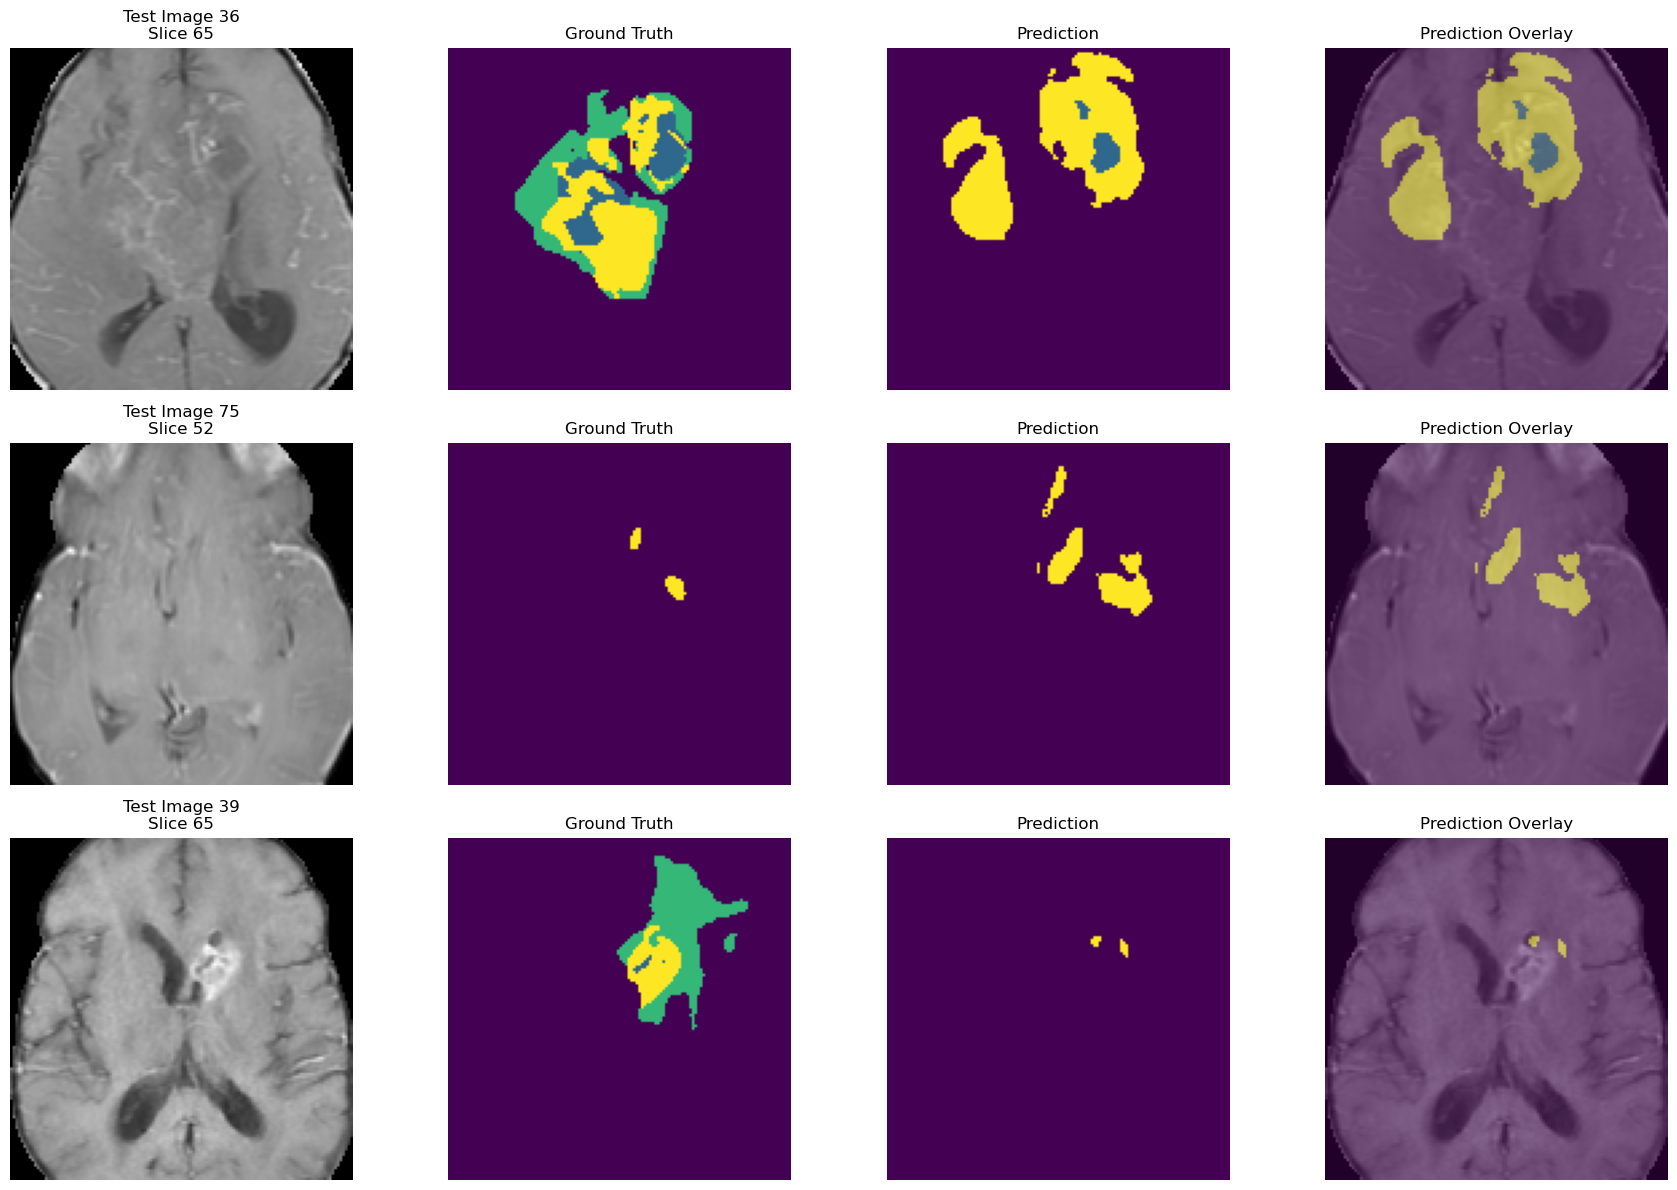

In [38]:
#-------------------- VISUALIZATION --------------------
import random
import os
import glob

# Get list of available test images
image_files = glob.glob(os.path.join(test_img_dir, "image_*.npy"))

# Randomly select 3 different test images
selected_images = random.sample(image_files, 3)

# Plotting Results
plt.figure(figsize=(18, 12))

for i, img_path in enumerate(selected_images):
    # Extract image number from filename
    img_num = os.path.basename(img_path).split('_')[1].split('.')[0]
    
    # Load test image and mask
    test_img = np.load(img_path)
    test_mask = np.load(os.path.join(test_mask_dir, f"mask_{img_num}.npy"))
    test_mask_argmax = np.argmax(test_mask, axis=3)
    
    # Model prediction
    test_img_input = np.expand_dims(test_img, axis=0)
    test_prediction = my_model.predict(test_img_input, verbose=0)
    test_prediction_argmax = np.argmax(test_prediction, axis=4)[0, :, :, :]
    
    # Randomly select a slice from the middle third of the image
    depth = test_img.shape[2]
    n_slice = random.randint(depth//3, 2*depth//3)
    
    # Rotate images to correct orientation
    test_img_rotated = np.rot90(test_img[:, :, n_slice, 1])  # Using channel 1
    test_mask_rotated = np.rot90(test_mask_argmax[:, :, n_slice])
    test_prediction_rotated = np.rot90(test_prediction_argmax[:, :, n_slice])

    # Plotting Results
    # Test Image
    plt.subplot(3, 4, i*4 + 1)
    plt.title(f'Test Image {img_num}\nSlice {n_slice}')
    plt.imshow(test_img_rotated, cmap='gray')
    plt.axis('off')
    
    # Ground Truth
    plt.subplot(3, 4, i*4 + 2)
    plt.title('Ground Truth')
    plt.imshow(test_mask_rotated)
    plt.axis('off')
    
    # Prediction
    plt.subplot(3, 4, i*4 + 3)
    plt.title('Prediction')
    plt.imshow(test_prediction_rotated)
    plt.axis('off')
    
    # Overlay
    plt.subplot(3, 4, i*4 + 4)
    plt.title('Prediction Overlay')
    plt.imshow(test_img_rotated, cmap='gray')
    plt.imshow(test_prediction_rotated, alpha=0.5)
    plt.axis('off')

plt.tight_layout()
plt.show()